In [1]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("Facial_Images"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'Facial_Images'.
There are 7 directories and 1 images in 'Facial_Images/train'.
There are 0 directories and 7164 images in 'Facial_Images/train/happy'.
There are 0 directories and 4938 images in 'Facial_Images/train/sad'.
There are 0 directories and 4104 images in 'Facial_Images/train/fear'.
There are 0 directories and 3205 images in 'Facial_Images/train/surprise'.
There are 0 directories and 4982 images in 'Facial_Images/train/neutral'.
There are 1 directories and 3993 images in 'Facial_Images/train/angry'.
There are 0 directories and 1 images in 'Facial_Images/train/angry/.ipynb_checkpoints'.
There are 0 directories and 446 images in 'Facial_Images/train/disgust'.
There are 7 directories and 1 images in 'Facial_Images/validation'.
There are 0 directories and 1825 images in 'Facial_Images/validation/happy'.
There are 0 directories and 1139 images in 'Facial_Images/validation/sad'.
There are 0 directories and 1018 images in 'Facial_Images/validat

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Creating a Data Loaders

In [3]:
IMAGE_SHAPE = (256,256)
BATCH_SIZE = 32

In [4]:
IMAGE_SHAPE = (256,256)
BATCH_SIZE = 32

train_dir = "Facial_Images/train"
test_dir = "Facial_Images/validation"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=30,
    height_shift_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(1./255)

In [5]:
print("Training Data")

train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode='categorical')

print("Test Data")

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=IMAGE_SHAPE,
                                            batch_size=BATCH_SIZE,
                                            class_mode='categorical',
                                            shuffle=False)

Training Data
Found 28833 images belonging to 7 classes.
Test Data
Found 7077 images belonging to 7 classes.


In [6]:
train_dir_1 = "fer2013/train"
test_dir_1 = "fer2013/validation"

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_daatgen = ImageDataGenerator(rescale = 1/255.)

print("Training Data")
training_data_FER = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                        label_mode="categorical",
                                                                        image_size=IMAGE_SHAPE,
                                                                        batch_size=BATCH_SIZE)

print("Validation Data")
validation_data_FER = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                          label_mode="categorical",
                                                                          image_size=IMAGE_SHAPE,
                                                                          batch_size=BATCH_SIZE,
                                                                          shuffle=False)

Training Data
Found 28833 files belonging to 7 classes.
Validation Data
Found 7077 files belonging to 7 classes.


# Creating a tensorflow callback

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Creating a Data Agumentation Layer

In [9]:
from tensorflow.keras import layers
from tensorflow.keras import preprocessing

In [10]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomHeight, RandomWidth, RandomZoom
from tensorflow.keras.models import Sequential

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2)
], name="data_augmentation")

# Creating a base model and freezing its layers

In [11]:
import tensorflow as tf
from tensorflow.keras import layers

# Load base model
base_modle = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_modle.trainable = False

# Set up the model architecture with trainable top layers
inputs = layers.Input(shape=(256, 256, 3), name="Input_Layer")
x = data_augmentation(inputs)
x = base_modle(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Ensure the correct number of classes, replacing 'training_data_FER.7' with the actual number of classes
num_classes = 7  # Example number of classes, replace with actual number if different
outputs = layers.Dense(num_classes, activation="softmax", name="Output_Layer")(x)

# Create the model
model = tf.keras.Model(inputs, outputs)

In [12]:
base_modle.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, None,      │          0 │ input_layer[0][0] │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, None,      │          0 │ rescaling[0][0]   │
│ (Normalization)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │        864 │ normalization[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, None,      │      4,608 │ stem_activation[… │
│ (Conv2D)            │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, None,      │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, None,      │          0 │ block1a_project_… │
│ (Activation)        │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, None,      │      9,216 │ block1a_project_… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, None,      │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, None,      │          0 │ block2a_expand_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, None,      │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, None,      │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, None,      │     36,864 │ block2a_project_… │
│ (Conv2D)            │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, None,      │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, None,      │          0 │ block2b_expand_b

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,919,312 (22.58 MB)

In [13]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, None, None,     │     5,919,312 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 7)              │         8,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,928,279 (22.61 MB)

 Trainable params: 8,967 (35.03 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [14]:
model.compile(loss="categorical_crossentropy",
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

In [15]:
history = model.fit(training_data_FER,
                   epochs=30,
                   validation_data=validation_data_FER)

Epoch 1/30
902/902 ━━━━━━━━━━━━━━━━━━━━ 434s 478ms/step - accuracy: 0.3283 - loss: 1.6743 - val_accuracy: 0.4493 - val_loss: 1.4810
Epoch 2/30
902/902 ━━━━━━━━━━━━━━━━━━━━ 509s 564ms/step - accuracy: 0.4160 - loss: 1.5106 - val_accuracy: 0.4454 - val_loss: 1.4649
Epoch 3/30
902/902 ━━━━━━━━━━━━━━━━━━━━ 1152s 1s/step - accuracy: 0.4354 - loss: 1.4759 - val_accuracy: 0.4649 - val_loss: 1.4363
Epoch 4/30
902/902 ━━━━━━━━━━━━━━━━━━━━ 1166s 1s/step - accuracy: 0.4399 - loss: 1.4565 - val_accuracy: 0.4556 - val_loss: 1.4277
Epoch 5/30
902/902 ━━━━━━━━━━━━━━━━━━━━ 1152s 1s/step - accuracy: 0.4509 - loss: 1.4336 - val_accuracy: 0.4765 - val_loss: 1.3906
Epoch 6/30
902/902 ━━━━━━━━━━━━━━━━━━━━ 1241s 1s/step - accuracy: 0.4523 - loss: 1.4303 - val_accuracy: 0.4752 - val_loss: 1.4035
Epoch 7/30
902/902 ━━━━━━━━━━━━━━━━━━━━ 1242s 1s/step - accuracy: 0.4553 - loss: 1.4265 - val_accuracy: 0.4902 - val_loss: 1.3593
Epoch 8/30
902/902 ━━━━━━━━━━━━━━━━━━━━ 1239s 1s/step - accuracy: 0.4611 - loss: 1.412

In [11]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

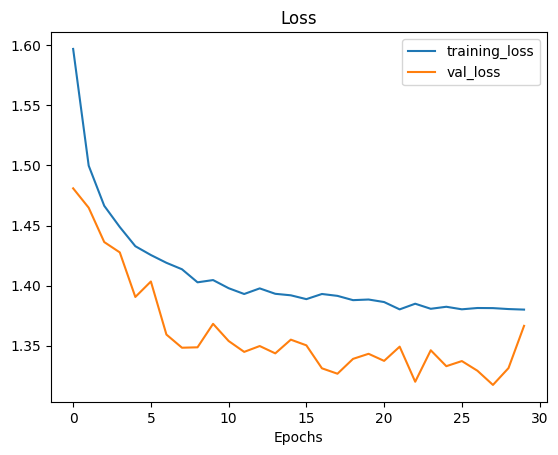

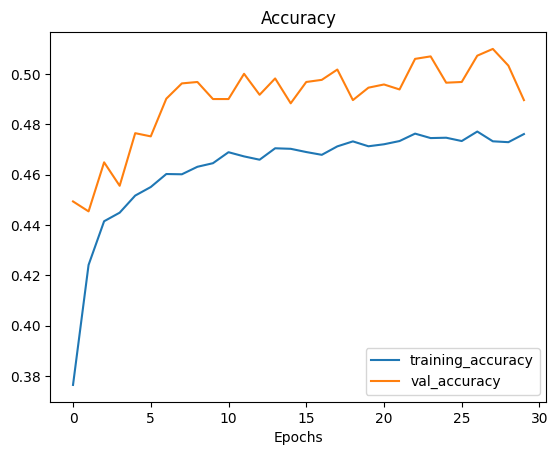

In [17]:
plot_loss_curves(history)

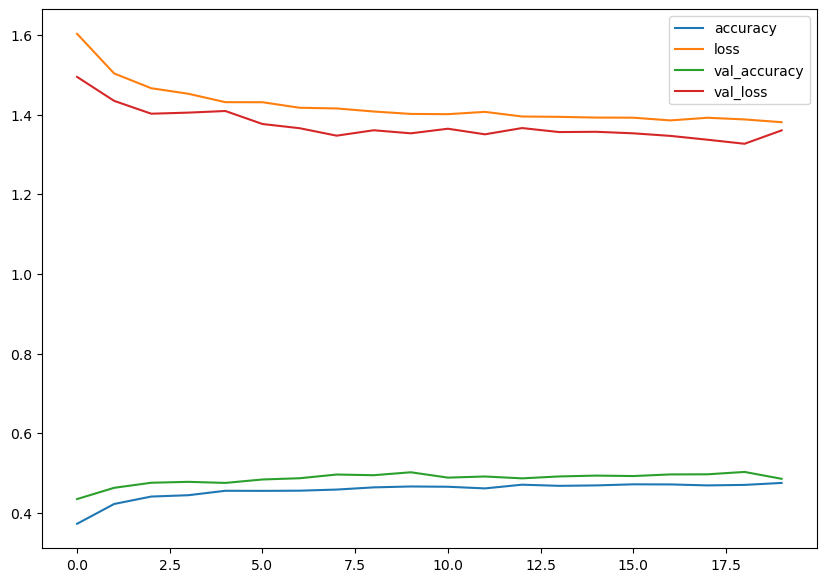

In [16]:
import pandas as pd
pd.DataFrame(model.history.history).plot(figsize=(10,7));

In [19]:
fine_tune_epochs = 50 # model has already done 5 epochs, this is the total number of epochs we're after (5+5=10)

history_4 = model.fit(training_data_FER,
                      epochs=fine_tune_epochs,
                      validation_data=validation_data_FER,
                      initial_epoch=history.epoch[-1]) # start from previous last epoch

Epoch 30/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 420s 465ms/step - accuracy: 0.4772 - loss: 1.3779 - val_accuracy: 0.5059 - val_loss: 1.3259
Epoch 31/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 423s 469ms/step - accuracy: 0.4802 - loss: 1.3751 - val_accuracy: 0.4968 - val_loss: 1.3350
Epoch 32/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 433s 480ms/step - accuracy: 0.4774 - loss: 1.3831 - val_accuracy: 0.5069 - val_loss: 1.3238
Epoch 33/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 432s 479ms/step - accuracy: 0.4719 - loss: 1.3826 - val_accuracy: 0.5033 - val_loss: 1.3229
Epoch 34/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 430s 477ms/step - accuracy: 0.4834 - loss: 1.3722 - val_accuracy: 0.5049 - val_loss: 1.3230
Epoch 35/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 928s 1s/step - accuracy: 0.4700 - loss: 1.3791 - val_accuracy: 0.4980 - val_loss: 1.3259
Epoch 36/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1286s 1s/step - accuracy: 0.4712 - loss: 1.3798 - val_accuracy: 0.4933 - val_loss: 1.3470
Epoch 37/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 441s 489ms/step - accuracy: 0.477

In [12]:
def compare_historys(original_history, new_history, initial_epochs):
    """
    Compares two TensorFlow model History objects.
    
    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here) 
    """
    
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

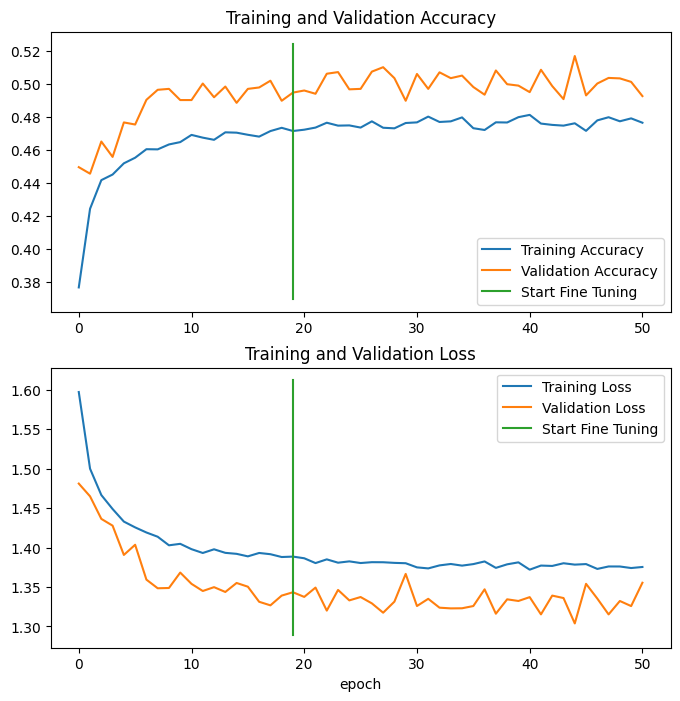

In [21]:
compare_historys(history,history_4,initial_epochs=20)

In [22]:
base_modle.trainable = True

for layer in base_modle.layers[:-5]:
  layer.trainable = False

In [23]:
model.compile(loss='categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(1e-4),
               metrics=['accuracy'])

In [24]:
for layer in model.layers:
    print(layer.name, layer.trainable)

Input_Layer True
data_augmentation True
efficientnetv2-b0 True
global_average_pooling_layer True
Output_Layer True


In [25]:
for layer_number, layer in enumerate(base_modle.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [26]:
fine_tune_epochs = 50 # model has already done 5 epochs, this is the total number of epochs we're after (5+5=10)

history_5 = model.fit(training_data_FER,
                      epochs=fine_tune_epochs,
                      validation_data=validation_data_FER,
                      initial_epoch=history.epoch[-1]) # start from previous last epoch

Epoch 30/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 972s 1s/step - accuracy: 0.4418 - loss: 1.4809 - val_accuracy: 0.5251 - val_loss: 1.2872
Epoch 31/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1244s 1s/step - accuracy: 0.4817 - loss: 1.3600 - val_accuracy: 0.5401 - val_loss: 1.2580
Epoch 32/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1139s 1s/step - accuracy: 0.5023 - loss: 1.3096 - val_accuracy: 0.5471 - val_loss: 1.2250
Epoch 33/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1112s 1s/step - accuracy: 0.5100 - loss: 1.2960 - val_accuracy: 0.5495 - val_loss: 1.2293
Epoch 34/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1120s 1s/step - accuracy: 0.5135 - loss: 1.2784 - val_accuracy: 0.5495 - val_loss: 1.2287
Epoch 35/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1135s 1s/step - accuracy: 0.5195 - loss: 1.2679 - val_accuracy: 0.5505 - val_loss: 1.2088
Epoch 36/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 567s 628ms/step - accuracy: 0.5327 - loss: 1.2424 - val_accuracy: 0.5689 - val_loss: 1.1733
Epoch 37/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 434s 481ms/step - accuracy: 0.5333 - loss

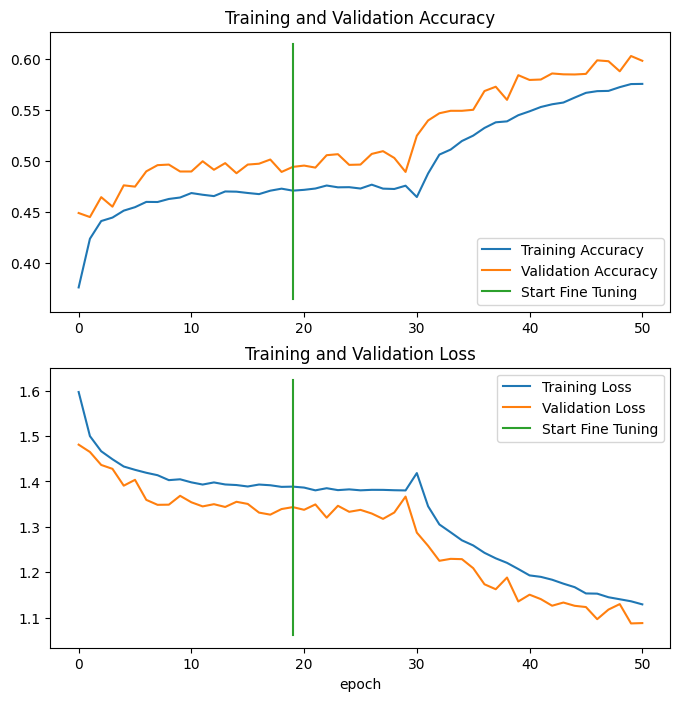

In [27]:
compare_historys(history,history_5,initial_epochs=20)

In [28]:
pred_probs = model.predict(validation_data_FER, verbose=1)

222/222 ━━━━━━━━━━━━━━━━━━━━ 72s 323ms/step


In [29]:
pred_probs

array([[2.89447129e-01, 2.58420827e-03, 8.84998143e-02, ...,
        1.12955496e-01, 2.62475401e-01, 7.71980081e-03],
       [1.82472467e-02, 9.66284540e-04, 6.06901348e-01, ...,
        9.38347653e-02, 2.56718576e-01, 2.27391385e-02],
       [3.81002575e-01, 4.85070422e-03, 1.75908923e-01, ...,
        1.13763139e-01, 3.01759362e-01, 2.03520665e-03],
       ...,
       [1.51969269e-02, 2.13324704e-04, 1.68603212e-02, ...,
        5.71590364e-02, 1.15883462e-02, 6.30974054e-01],
       [1.34753749e-01, 3.81727354e-03, 1.84831932e-01, ...,
        1.73296899e-01, 1.80831030e-01, 3.56533974e-02],
       [1.32774422e-02, 4.02613869e-03, 7.76369646e-02, ...,
        6.01680614e-02, 2.66453009e-02, 3.82076681e-01]], dtype=float32)

# Saving the models

In [30]:
model_json = model.to_json()
with open("Transfer_Learning_B0.json", "w") as json_file:  # Change the filename here
    json_file.write(model_json)

In [31]:
model.save_weights('Transfer_Learning_B0.weights.h5')

In [9]:
import tensorflow as tf
from tensorflow.keras.models import model_from_json

# Load the model architecture from the JSON file
with open("Transfer_Learning_B0.json.json", "r") as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)
print("Model architecture loaded.")

# Load the model weights from the HDF5 file
loaded_model.load_weights("transfer_learning.weights.h5")
print("Model weights loaded.")

# Compile the loaded model (necessary before using it for predictions or further training)
loaded_model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

print("Model compiled and ready to use.")

Model architecture loaded.
Model weights loaded.
Model compiled and ready to use.


/Users/sohampingale/anaconda3/envs/env/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 488 variables whereas the saved optimizer has 12 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [10]:
pred_probs_after_loading= loaded_model.predict(validation_data_FER, verbose=1)

222/222 ━━━━━━━━━━━━━━━━━━━━ 207s 929ms/step


In [11]:
pred_probs_after_loading

array([[3.1020060e-01, 3.3331676e-03, 7.4104898e-02, ..., 1.3343161e-01,
        2.8431374e-01, 6.1299833e-03],
       [2.4998495e-02, 6.8687199e-04, 7.0324022e-01, ..., 9.0683043e-02,
        1.5043093e-01, 2.8972724e-02],
       [4.4827878e-01, 5.1951702e-03, 1.7778695e-01, ..., 8.1241906e-02,
        2.4031036e-01, 3.6738073e-03],
       ...,
       [1.4011360e-02, 2.9884171e-04, 2.3494627e-02, ..., 3.6465775e-02,
        1.6594838e-02, 6.0718709e-01],
       [8.0085613e-02, 1.5786731e-03, 1.3165589e-01, ..., 2.6263398e-01,
        1.2965004e-01, 4.6419308e-02],
       [1.8254772e-02, 7.9857698e-03, 6.8275318e-02, ..., 6.1681088e-02,
        3.2007232e-02, 3.2988283e-01]], dtype=float32)

# testing

# Calculating scores

In [ ]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

# Confusion Metrix

# One model ends here

In [33]:
x="hello"[0]
x

'h'

# Trying Out B3 Model

In [13]:
import tensorflow as tf
from tensorflow.keras import layers

In [14]:
tf.random.set_seed(42)

In [15]:
import tensorflow as tf
from tensorflow.keras import layers

# Load base model
base_modle_B1 = tf.keras.applications.efficientnet_v2.EfficientNetV2B3(include_top=False)
base_modle_B1.trainable = False

# Set up the model architecture with trainable top layers
inputs = layers.Input(shape=(256, 256, 3), name="Input_Layer")
x = data_augmentation(inputs)
x = base_modle_B1(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Ensure the correct number of classes, replacing 'training_data_FER.7' with the actual number of classes
num_classes = 7  # Example number of classes, replace with actual number if different
outputs = layers.Dense(num_classes, activation="softmax", name="Output_Layer")(x)

# Create the model
model_2 = tf.keras.Model(inputs, outputs)

In [16]:
base_modle_B1.summary()

Model: "efficientnetv2-b3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, None,      │          0 │ input_layer[0][0] │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, None,      │          0 │ rescaling[0][0]   │
│ (Normalization)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │      1,080 │ normalization[0]… │
│                     │ None, 40)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │        160 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 40)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 40)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, None,      │      5,760 │ stem_activation[… │
│ (Conv2D)            │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, None,      │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, None,      │          0 │ block1a_project_… │
│ (Activation)        │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, None,      │      2,304 │ block1a_project_… │
│ (Conv2D)            │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, None,      │         64 │ block1b_project_… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, None,      │          0 │ block1b_project_… │
│ (Activation)        │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, None,      │          0 │ block1b_project_… │
│ (Dropout)           │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, None,      │          0 │ block1b_drop[0][… │
│                     │ None, 16)         │            │ block1a_project_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, None,      │      9,216 │ block1b_add[0][0] │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, None,      │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, None,      │          0 │ block2a_expand_b

 Total params: 12,930,622 (49.33 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 12,930,622 (49.33 MB)

In [17]:
model_2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b3 (Functional)  │ (None, None, None,     │    12,930,622 │
│                                 │ 1536)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1536)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 7)              │        10,759 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,941,381 (49.37 MB)

 Trainable params: 10,759 (42.03 KB)

 Non-trainable params: 12,930,622 (49.33 MB)

In [18]:
model_2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [19]:
history_6 = model_2.fit(training_data_FER,
                        epochs=30,
                        validation_data=validation_data_FER)

Epoch 1/30
902/902 ━━━━━━━━━━━━━━━━━━━━ 2400s 3s/step - accuracy: 0.3380 - loss: 1.6700 - val_accuracy: 0.4701 - val_loss: 1.4096
Epoch 2/30
902/902 ━━━━━━━━━━━━━━━━━━━━ 2504s 3s/step - accuracy: 0.4163 - loss: 1.5109 - val_accuracy: 0.4890 - val_loss: 1.3660
Epoch 3/30
902/902 ━━━━━━━━━━━━━━━━━━━━ 2634s 3s/step - accuracy: 0.4300 - loss: 1.4805 - val_accuracy: 0.4963 - val_loss: 1.3458
Epoch 4/30
902/902 ━━━━━━━━━━━━━━━━━━━━ 2538s 3s/step - accuracy: 0.4370 - loss: 1.4669 - val_accuracy: 0.5078 - val_loss: 1.3262
Epoch 5/30
902/902 ━━━━━━━━━━━━━━━━━━━━ 2255s 3s/step - accuracy: 0.4386 - loss: 1.4559 - val_accuracy: 0.5139 - val_loss: 1.3052
Epoch 6/30
902/902 ━━━━━━━━━━━━━━━━━━━━ 2201s 2s/step - accuracy: 0.4497 - loss: 1.4387 - val_accuracy: 0.5042 - val_loss: 1.3164
Epoch 7/30
902/902 ━━━━━━━━━━━━━━━━━━━━ 2152s 2s/step - accuracy: 0.4502 - loss: 1.4385 - val_accuracy: 0.5142 - val_loss: 1.2878
Epoch 8/30
902/902 ━━━━━━━━━━━━━━━━━━━━ 2099s 2s/step - accuracy: 0.4565 - loss: 1.4300 - 

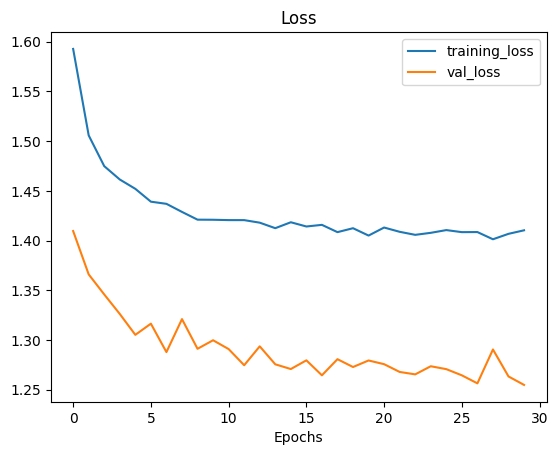

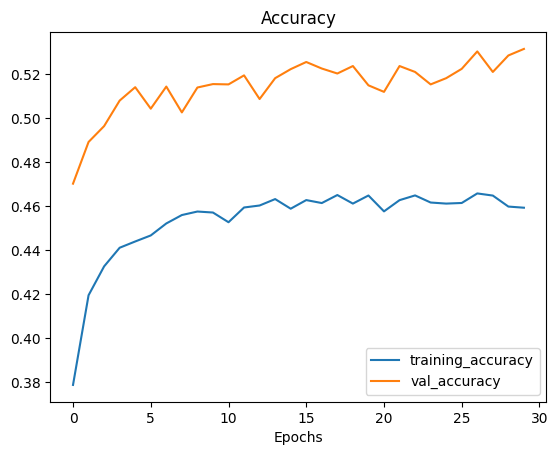

In [20]:
plot_loss_curves(history_6)

In [21]:
base_modle_B1.trainable = True

for layer in base_modle_B1.layers[:-5]:
  layer.trainable = False

In [22]:
model_2.compile(loss='categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(1e-4),
               metrics=['accuracy'])

In [23]:
for layer in model_2.layers:
    print(layer.name, layer.trainable)

Input_Layer True
data_augmentation True
efficientnetv2-b3 True
global_average_pooling_layer True
Output_Layer True


In [24]:
for layer_number, layer in enumerate(base_modle_B1.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block1b_project_conv False
10 block1b_project_bn False
11 block1b_project_activation False
12 block1b_drop False
13 block1b_add False
14 block2a_expand_conv False
15 block2a_expand_bn False
16 block2a_expand_activation False
17 block2a_project_conv False
18 block2a_project_bn False
19 block2b_expand_conv False
20 block2b_expand_bn False
21 block2b_expand_activation False
22 block2b_project_conv False
23 block2b_project_bn False
24 block2b_drop False
25 block2b_add False
26 block2c_expand_conv False
27 block2c_expand_bn False
28 block2c_expand_activation False
29 block2c_project_conv False
30 block2c_project_bn False
31 block2c_drop False
32 block2c_add False
33 block3a_expand_conv False
34 block3a_expand_bn False
35 block3a_expand_activation False
36 block3a_project_conv False
3

In [25]:
fine_tune_epochs = 50 # model has already done 5 epochs, this is the total number of epochs we're after (5+5=10)

history_7 = model_2.fit(training_data_FER,
                        epochs=fine_tune_epochs,
                        validation_data=validation_data_FER,
                        initial_epoch=history_6.epoch[-1]) # start from previous last epoch

Epoch 30/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 2319s 3s/step - accuracy: 0.4533 - loss: 1.4477 - val_accuracy: 0.5330 - val_loss: 1.2453
Epoch 31/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 2261s 3s/step - accuracy: 0.4759 - loss: 1.3751 - val_accuracy: 0.5483 - val_loss: 1.2065
Epoch 32/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 2252s 2s/step - accuracy: 0.4900 - loss: 1.3427 - val_accuracy: 0.5430 - val_loss: 1.2092
Epoch 33/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 2095s 2s/step - accuracy: 0.5018 - loss: 1.3160 - val_accuracy: 0.5577 - val_loss: 1.1717
Epoch 34/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 2095s 2s/step - accuracy: 0.5135 - loss: 1.2838 - val_accuracy: 0.5669 - val_loss: 1.1625
Epoch 35/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 2091s 2s/step - accuracy: 0.5210 - loss: 1.2760 - val_accuracy: 0.5488 - val_loss: 1.2251
Epoch 36/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 2093s 2s/step - accuracy: 0.5186 - loss: 1.2645 - val_accuracy: 0.5665 - val_loss: 1.1496
Epoch 37/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 8869s 10s/step - accuracy: 0.5293 - loss: 

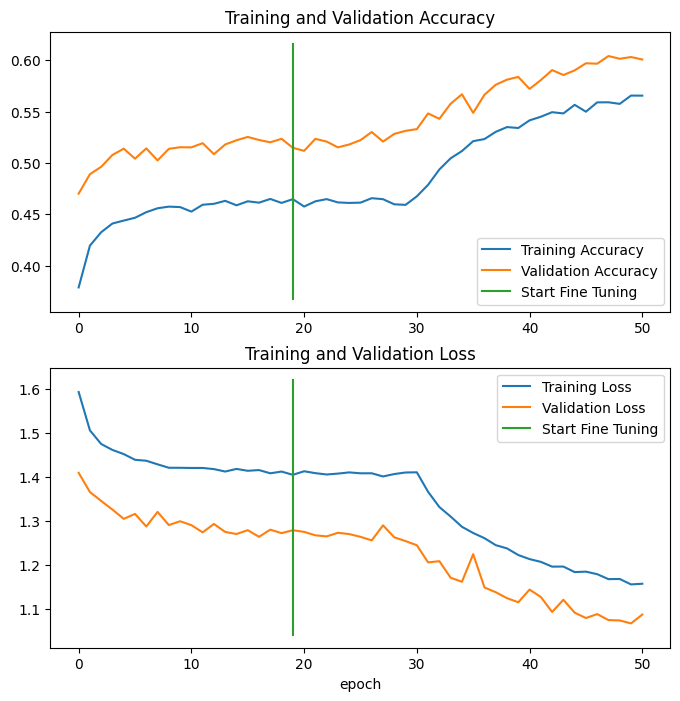

In [27]:
compare_historys(original_history=history_6,new_history=history_7,initial_epochs=20)

In [29]:
model_2_json = model_2.to_json()
with open("Transfer_Learning_V2_B3.json", "w") as json_file:  # Change the filename here
    json_file.write(model_2_json)

In [31]:
model_2.save_weights('Transfer_Learning_V2_B3.weights.h5')

In [25]:
base_modle_B1.trainable = True

for layer in base_modle_B1.layers[:-10]:
  layer.trainable = False

In [26]:
model_2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
               metrics=["accuracy"])

In [27]:
history_8 = model_2.fit(training_data_FER,
                       epochs=40,
                       validation_data=validation_data_FER,
                       initial_epoch=history_6.epoch[-1])

Epoch 20/40
901/901 ━━━━━━━━━━━━━━━━━━━━ 792s 874ms/step - accuracy: 0.5696 - loss: 1.1441 - val_accuracy: 0.6029 - val_loss: 1.0665
Epoch 21/40
901/901 ━━━━━━━━━━━━━━━━━━━━ 792s 879ms/step - accuracy: 0.5724 - loss: 1.1409 - val_accuracy: 0.6019 - val_loss: 1.0639
Epoch 22/40
901/901 ━━━━━━━━━━━━━━━━━━━━ 818s 908ms/step - accuracy: 0.5777 - loss: 1.1343 - val_accuracy: 0.6029 - val_loss: 1.0683
Epoch 23/40
901/901 ━━━━━━━━━━━━━━━━━━━━ 830s 921ms/step - accuracy: 0.5799 - loss: 1.1317 - val_accuracy: 0.6094 - val_loss: 1.0551
Epoch 24/40
901/901 ━━━━━━━━━━━━━━━━━━━━ 835s 927ms/step - accuracy: 0.5800 - loss: 1.1237 - val_accuracy: 0.6089 - val_loss: 1.0564
Epoch 25/40
901/901 ━━━━━━━━━━━━━━━━━━━━ 822s 913ms/step - accuracy: 0.5772 - loss: 1.1320 - val_accuracy: 0.6079 - val_loss: 1.0607
Epoch 26/40
901/901 ━━━━━━━━━━━━━━━━━━━━ 833s 925ms/step - accuracy: 0.5836 - loss: 1.1177 - val_accuracy: 0.6075 - val_loss: 1.0639
Epoch 27/40
901/901 ━━━━━━━━━━━━━━━━━━━━ 829s 920ms/step - accuracy: 

KeyboardInterrupt: 

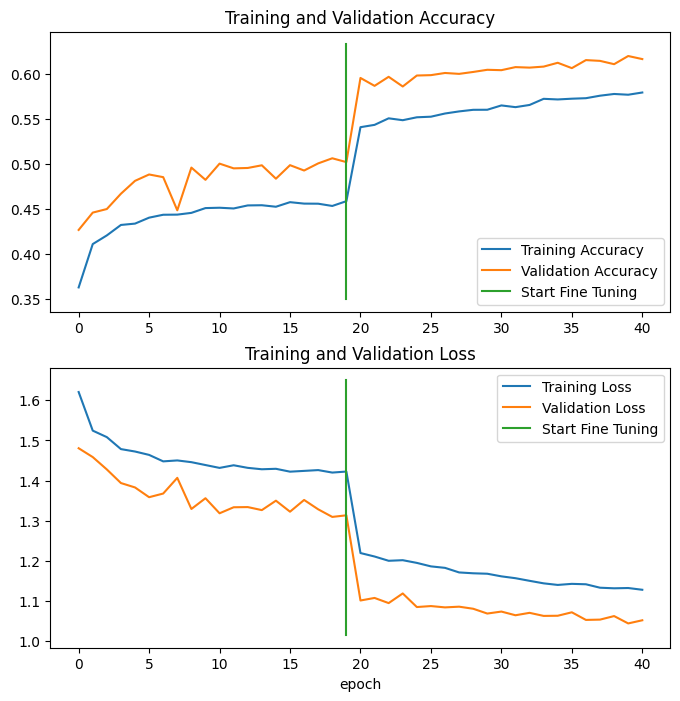

In [42]:
compare_historys(original_history=history_6,new_history=history_8,initial_epochs=20)

In [44]:
model_2_json = model_2.to_json()
with open("Transfer.json", "w") as json_file:  # Change the filename here
    json_file.write(model_2_json)

In [45]:
model_2.save_weights('transfer_learning_B2.weights.h5')